### Домашнее задание к лекции «Задачи классификации и кластеризации»

#### Задание.

Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn) https://archive.ics.uci.edu/ml/datasets/Iris

Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

Разделите данные на выборку для обучения и тестирования

Постройте модель LDA

Визуализируйте предсказания для тестовой выборки и центры классов

Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
# Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
data = data.iloc[:, 0:2]
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [6]:
variety = iris.target
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# Разделите данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25)

In [8]:
len(y_test)

38

In [9]:
# Постройте модель LDA

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
lda = LinearDiscriminantAnalysis()

In [12]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [13]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 2, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0])

In [14]:
# смотрим разницу факта и прогноза
# 0 - факт, 1 - прогноз
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,1
1,2,2
2,2,2
3,1,2
4,2,2
5,0,0
6,2,1
7,0,0
8,0,0
9,1,1


In [15]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_test, lda.predict(X_test))

0.8421052631578947

In [17]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-6.0069295 ,  7.82592907],
       [ 2.34663785, -4.34382958],
       [ 4.25468898, -3.98357728]])

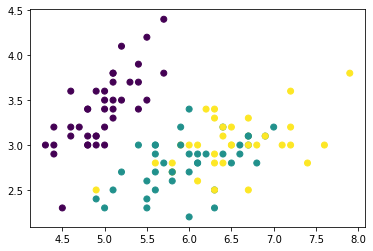

In [18]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [19]:
# Визуализируйте предсказания для тестовой выборки и центры классов

In [20]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

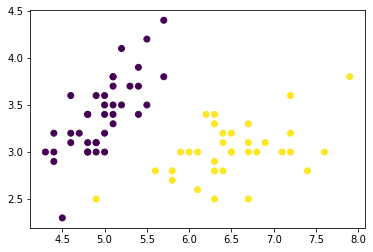

In [21]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [22]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [23]:
# центроиды
lda_small.means_

array([[4.97435897, 3.4       ],
       [6.50606061, 3.01212121]])

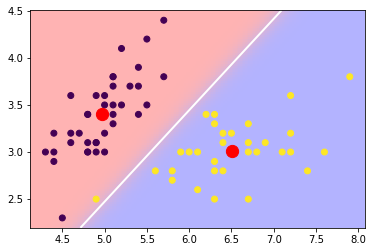

In [24]:
# Построение карты визуализации классов

# Формирование условий для цветовой карты
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

# scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='o')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [25]:
# Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [26]:
# оба признака примерно одинаково влияют на кластеризацию. 
# Второй признак sepal width (cm) всего на 25% важнее первого sepal length (cm)
lda_small.coef_

array([[ 11.37190838, -11.70952097]])

In [27]:
# Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [28]:
from sklearn.cluster import KMeans

In [29]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_train)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

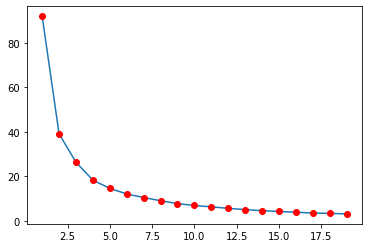

In [30]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [31]:
# Вывод: достаточно 2 или 3 кластера

In [32]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_train)
clusters

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1])

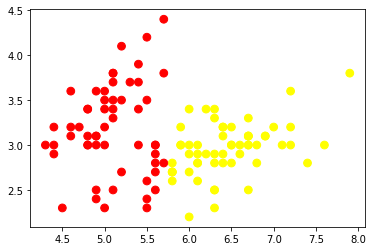

In [33]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], cmap='autumn', c=clusters, s=60)